In [27]:
print("sgn")

sgn


In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b0a45b0f87756393fc18ed6c574fe0e5023c6e886edba3abe4c137440173209b
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from math import sqrt
from qiskit.visualization import plot_histogram
from numpy import array
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

In [ ]:
v = Statevector(array([1,1.0j])/sqrt(2))
u = Statevector(array([1, sqrt(2)*1.0j])/sqrt(3))

In [ ]:
v.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
v.is_valid()

True

In [ ]:
w = v+u

In [ ]:
w.is_valid()

False

In [ ]:
w.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
# prompt: compute euclidean norm of w

from numpy.linalg import norm

w_vector = w.data
euclidean_norm = norm(w_vector)

print("Euclidean norm of w:", euclidean_norm)

Euclidean norm of w: 1.9927862703528891


In [ ]:
w.data

array([1.28445705+0.j        , 0.        +1.52360336j])

In [ ]:
u.measure()

(np.str_('0'),
 Statevector([1.+0.j, 0.+0.j],
             dims=(2,)))

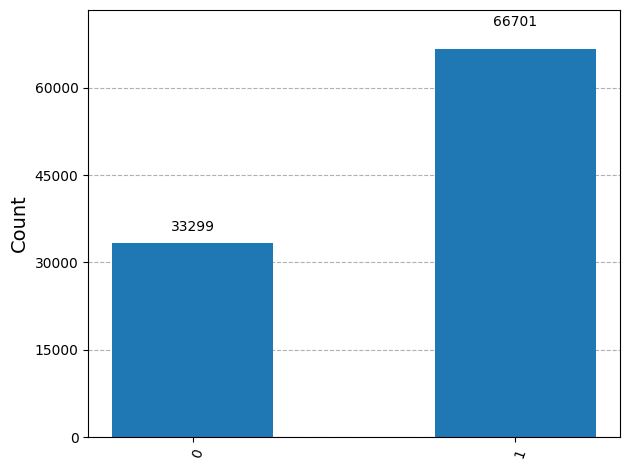

In [ ]:
stats = u.sample_counts(100000)
plot_histogram(stats)

In [ ]:
stats

{np.str_('0'): np.int64(33299), np.str_('1'): np.int64(66701)}

In [ ]:
from qiskit import QuantumCircuit

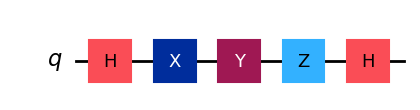

In [ ]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.x(0)
circuit.y(0)
circuit.z(0)
circuit.h(0)
circuit.draw(output="mpl")

In [ ]:
ket = Statevector(array([1,0]))
ket.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
ket = ket.evolve(circuit)
ket.draw("latex")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


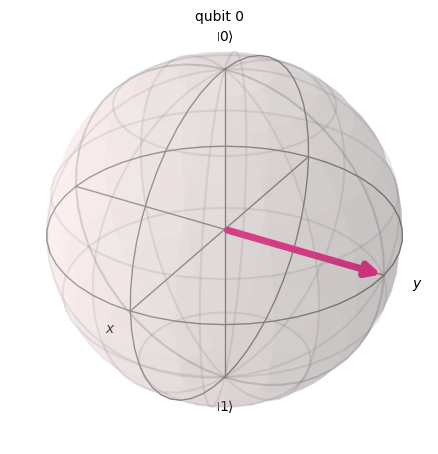

In [ ]:
# prompt: this is wrong. I want bloch sphere

from qiskit.visualization import plot_bloch_multivector
import numpy as np

# Assuming you have a statevector 'w' defined from previous code
# If not, replace 'w' with your desired statevector
print( v.draw("latex") )
plot_bloch_multivector(v)

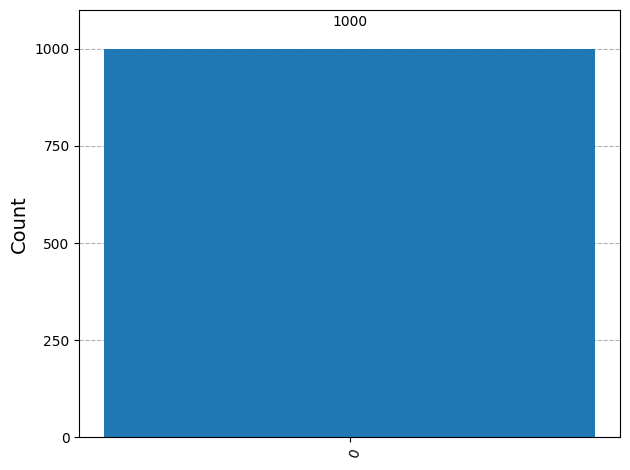

In [ ]:
stats = ket.sample_counts(1000)
plot_histogram(stats)

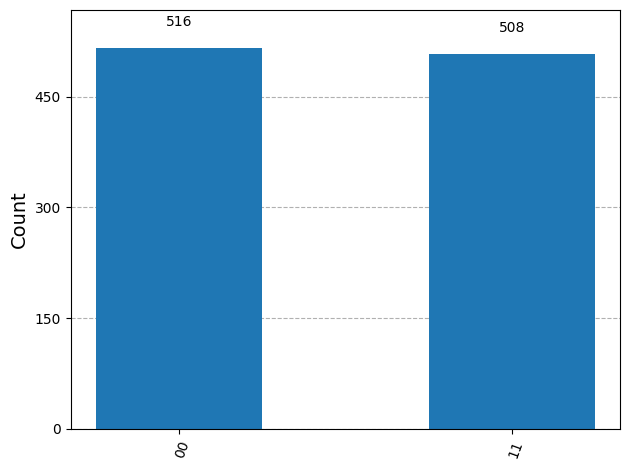

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw(output="mpl")
simulator_measure = AerSimulator(method="density_matrix")
compiled_circ = transpile(qc, simulator_measure)
result_measure = simulator_measure.run(compiled_circ, shots = 1024).result()
counts = result_measure.get_counts(qc)
plot_histogram(counts)

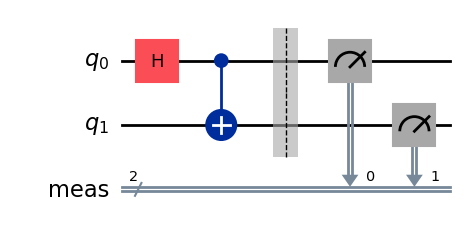

In [ ]:
compiled_circ.draw( output = "mpl")

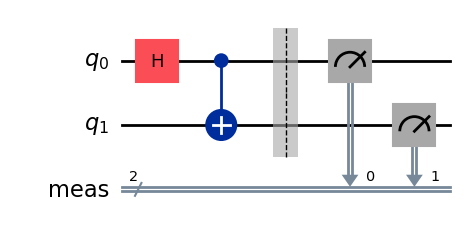

In [ ]:
qc.draw(output="mpl")

In [ ]:
zero, one = Statevector.from_label("0"), Statevector.from_label("1")
zero.tensor(one).draw("latex")

<IPython.core.display.Latex object>

In [ ]:
plus = Statevector.from_label("+")
i_state = Statevector([1 / sqrt(2), 1j / sqrt(2)])
psi = plus.tensor(i_state)

psi.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
X = Operator([[0, 1], [1, 0]])
I = Operator([[1, 0], [0, 1]])

X.tensor(I)

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [ ]:
token = "084a18465b483541fbffee9d8ccb26405d7ebdaeed4d18fe4f3b9f9193ed2b81193509e141bee54613b0728bf45541ab47c59f1e17f4836bea95e976cc602be3"

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

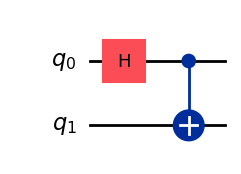

In [ ]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [ ]:
# Set up six different observables.

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, overwrite=True)


In [ ]:


service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)


In [ ]:
backend

<IBMBackend('ibm_sherbrooke')>

In [ ]:

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
backend

<IBMBackend('ibm_sherbrooke')>

In [ ]:
# Construct the Estimator instance.

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: czqfpchkzhn0008bvreg


In [ ]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()

# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

In [ ]:
pub_result

PubResult(data=DataBin(evs=np.ndarray(<shape=(6,), dtype=float64>), stds=np.ndarray(<shape=(6,), dtype=float64>), ensemble_standard_error=np.ndarray(<shape=(6,), dtype=float64>), shape=(6,)), metadata={'shots': 5024, 'target_precision': 0.01414213562373095, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32})

In [ ]:
from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler

service = QiskitRuntimeService()

# 1. A quantum circuit for preparing the quantum state (|00> + |11>)/rt{2}
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# 2: Optimize problem for quantum execution.
backend = service.least_busy(operational=True, simulator=False)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(bell)

# 3. Execute using the Sampler primitive
sampler = Sampler(mode=backend)
sampler.options.default_shots = 100000  # Options can be set using auto-complete.
job = sampler.run([isa_circuit])
print(f"Job ID is {job.job_id()}")
pub_result = job.result()[0]
print(f"Counts for the meas output register: {pub_result.data.meas.get_counts()}")

Job ID is czqhehad8drg008ghav0
Counts for the meas output register: {'01': 2403, '00': 44768, '11': 49458, '10': 3371}


In [ ]:
counts = pub_result.data.meas.get_counts()

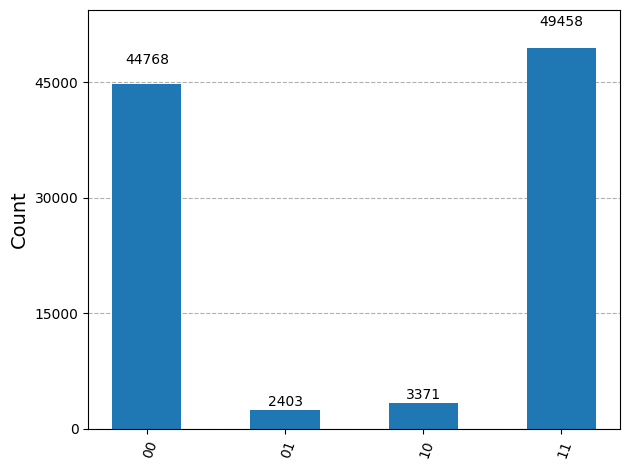

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
!pip freeze | grep qiskit

qiskit==2.0.0
qiskit-aer==0.17.0
qiskit-ibm-runtime==0.37.0
